In [22]:
# Creating the dataframe
import pandas as pd

data = {
    'StudID': ['Student1', 'Student2', 'Student3', 'Student4', 'Student5', 'Student6', 'Student7', 'Student8'],
    'Name': ['   Ariba  ', 'Vilas', 'Shivam    ', ' Pranay ', '   AnIL  ', 'ViKas', 'Vinit     ', ' Pranali '],
    'Class': ['Fy', 'fy', 'FY', 'fY', 'Fy', 'fy', 'FY', 'fY'],
    'Elective': ['SBCM', '   sbcm', 'AI', 'AI   ', 'SBCM', '   sbcm', 'AI', 'AI   '],
    'Msg': ['he\x00llo', 'My\nComputer', 'Hello Guy\\s', 'Good morning', 'he\x00llo', 'My\nComputer', 'Hello Guy\\s', 'Good morning'],
    'Test Score': [20, 8, 5, 11, 18, 9, 50, 10],
    'Date of Birth': ['06-09-2003', '02/02/24', '04-03-2006', '03/31/2003', '01-01-2001', '02/02/24', '04-03-2006', '03/31/2003']
}
df = pd.DataFrame(data)
print("Original Data : ")
df

Original Data : 


,StudID,Name,Class,Elective,Msg,Test Score,Date of Birth
0,Student1,Ariba,Fy,SBCM,he llo,20,06-09-2003
1,Student2,Vilas,fy,sbcm,My\nComputer,8,02/02/24
2,Student3,Shivam,FY,AI,Hello Guy\s,5,04-03-2006
3,Student4,Pranay,fY,AI,Good morning,11,03/31/2003
4,Student5,AnIL,Fy,SBCM,he llo,18,01-01-2001
5,Student6,ViKas,fy,sbcm,My\nComputer,9,02/02/24
6,Student7,Vinit,FY,AI,Hello Guy\s,50,04-03-2006
7,Student8,Pranali,fY,AI,Good morning,10,03/31/2003


In [23]:
df = df.apply(lambda x: x.str.strip() if x.dtype == "object" else x)
print("After removing leading and trailing spaces from dataframe :")
df

After removing leading and trailing spaces from dataframe :


,StudID,Name,Class,Elective,Msg,Test Score,Date of Birth
0,Student1,Ariba,Fy,SBCM,he llo,20,06-09-2003
1,Student2,Vilas,fy,sbcm,My\nComputer,8,02/02/24
2,Student3,Shivam,FY,AI,Hello Guy\s,5,04-03-2006
3,Student4,Pranay,fY,AI,Good morning,11,03/31/2003
4,Student5,AnIL,Fy,SBCM,he llo,18,01-01-2001
5,Student6,ViKas,fy,sbcm,My\nComputer,9,02/02/24
6,Student7,Vinit,FY,AI,Hello Guy\s,50,04-03-2006
7,Student8,Pranali,fY,AI,Good morning,10,03/31/2003


In [25]:
# Removing non-printable characters from msg column
import re
df['Msg'] = df['Msg'].apply(lambda x: re.sub(r'[^\x20-\x7E]', '', x).replace('\\', ''))
print("After removing non-printable characters in Msg column : ")

df

After removing non-printable characters in Msg column : 


,StudID,Name,Class,Elective,Msg,Test Score,Date of Birth
0,Student1,Ariba,Fy,SBCM,hello,20,06-09-2003
1,Student2,Vilas,fy,sbcm,MyComputer,8,02/02/24
2,Student3,Shivam,FY,AI,Hello Guys,5,04-03-2006
3,Student4,Pranay,fY,AI,Good morning,11,03/31/2003
4,Student5,AnIL,Fy,SBCM,hello,18,01-01-2001
5,Student6,ViKas,fy,sbcm,MyComputer,9,02/02/24
6,Student7,Vinit,FY,AI,Hello Guys,50,04-03-2006
7,Student8,Pranali,fY,AI,Good morning,10,03/31/2003


In [26]:
from datetime import datetime
def parse_dates(date):
    for fmt in ('%d-%m-%Y', '%d/%m/%y', '%m/%d/%Y', '%m/%d/%y'):
        try:
            return datetime.strptime(date, fmt).strftime('%d-%m-%Y')
        except ValueError:
            continue
    return pd.NaT  # If none of the formats work, return NaT

df['Date of Birth'] = df['Date of Birth'].apply(parse_dates)
print("Data after reformatting 'Date of Birth' column:")
df

Data after reformatting 'Date of Birth' column:


,StudID,Name,Class,Elective,Msg,Test Score,Date of Birth
0,Student1,Ariba,Fy,SBCM,hello,20,06-09-2003
1,Student2,Vilas,fy,sbcm,MyComputer,8,02-02-2024
2,Student3,Shivam,FY,AI,Hello Guys,5,04-03-2006
3,Student4,Pranay,fY,AI,Good morning,11,31-03-2003
4,Student5,AnIL,Fy,SBCM,hello,18,01-01-2001
5,Student6,ViKas,fy,sbcm,MyComputer,9,02-02-2024
6,Student7,Vinit,FY,AI,Hello Guys,50,04-03-2006
7,Student8,Pranali,fY,AI,Good morning,10,31-03-2003


In [19]:
df

,StudID,Name,Class,Elective,Msg,Test Score,Date of Birth
0,Student1,Ariba,Fy,SBCM,hello,20,06-09-2003
1,Student2,Vilas,fy,sbcm,MyComputer,8,02-02-2024
2,Student3,Shivam,FY,AI,Hello Guys,5,04-03-2006
3,Student4,Pranay,fY,AI,Good morning,11,31-03-2003
4,Student5,AnIL,Fy,SBCM,hello,18,01-01-2001
5,Student6,ViKas,fy,sbcm,MyComputer,9,02-02-2024
6,Student7,Vinit,FY,AI,Hello Guys,50,04-03-2006
7,Student8,Pranali,fY,AI,Good morning,10,31-03-2003


In [27]:
bins = [0, 10, 15, 20]
labels = ['poor', 'average', 'best']
df['Score Category'] = pd.cut(df['Test Score'], bins=bins, labels=labels, include_lowest=True)
print("Bins:")
print(df[['StudID', 'Test Score', 'Score Category']])

Bins:
     StudID  Test Score Score Category
0  Student1          20           best
1  Student2           8           poor
2  Student3           5           poor
3  Student4          11        average
4  Student5          18           best
5  Student6           9           poor
6  Student7          50            NaN
7  Student8          10           poor


In [28]:
average_score_fy = df[df['Class'].str.lower() == 'fy']['Test Score'].mean()
print(f"Average Test Score for class 'fy': {average_score_fy}")

Average Test Score for class 'fy': 16.375


In [29]:
Q1 = df['Test Score'].quantile(0.25)
Q3 = df['Test Score'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = df[(df['Test Score'] < lower_bound) | (df['Test Score'] > upper_bound)]
print("Outliers :")
print(outliers[['StudID', 'Test Score']])

Outliers :
     StudID  Test Score
6  Student7          50


In [32]:
import logging
logging.basicConfig(level=logging.DEBUG, format='%(asctime)s %(levelname)s - %(message)s')
def perform_operation(value):
    if value < 0:
        raise ValueError("Invalid value: Value cannot be negative.")
    else:
        logging.info("Operation performed successfully.")
try:
    input_value = int(input("Enter a value: "))
    perform_operation(input_value)
except ValueError as ve:
    logging.exception("Exception occurred: %s", str(ve))

Enter a value:  34


2024-08-15 20:43:44,999 INFO - Operation performed successfully.


In [33]:
start = pd.to_datetime('01-01-2000')
end = pd.to_datetime('01-01-2025')
df['Date of Birth'] = pd.to_datetime(df['Date of Birth'], errors='coerce')
dob = df[(df['Date of Birth'] >= start) & (df['Date of Birth'] <= end)]
print(dob[['Name', 'Date of Birth']])

     Name Date of Birth
0   Ariba    2003-06-09
1   Vilas    2024-02-02
2  Shivam    2006-04-03
4    AnIL    2001-01-01
5   ViKas    2024-02-02
6   Vinit    2006-04-03


In [34]:
d = df['Test Score'].values
v = d[(d<0) | (d>20)]
print("Invalid test score :",v)

Invalid test score : [50]


In [35]:
import re
s = df['Name']
def removePunc(z):
    return re.sub('[ 1-9!#.]', '' , z)
result = []
for x in map(removePunc, s):
    result.append(x)
print(result)

['Ariba', 'Vilas', 'Shivam', 'Pranay', 'AnIL', 'ViKas', 'Vinit', 'Pranali']


In [ ]:
'''
EDA
'''

In [38]:
print("Description of data :")
df.describe()

Description of data :


,Test Score,Date of Birth
count,8.000000,6
mean,16.375000,2010-11-08 04:00:00
min,5.000000,2001-01-01 00:00:00
25%,8.750000,2004-02-21 06:00:00
50%,10.500000,2006-04-03 00:00:00
75%,18.500000,2019-08-18 12:00:00
max,50.000000,2024-02-02 00:00:00
std,14.490761,NaN


In [39]:
print("Average of Test Score column is :",df['Test Score'].mean())

Average of Test Score column is : 16.375


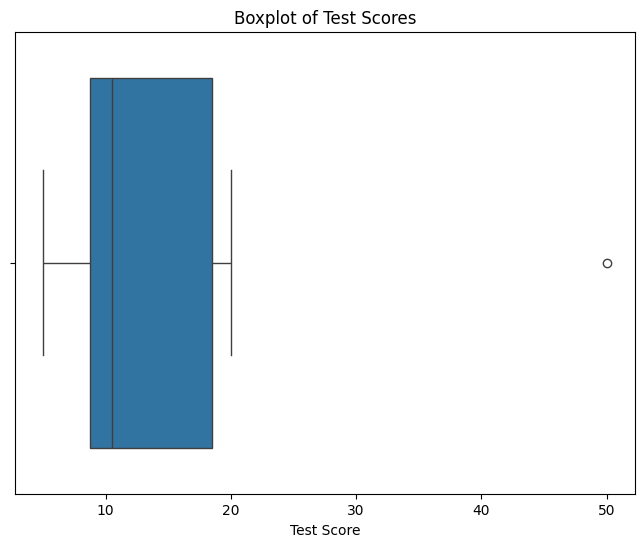

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns  # pip install seaborn
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['Test Score'])
plt.title('Boxplot of Test Scores')
plt.show()

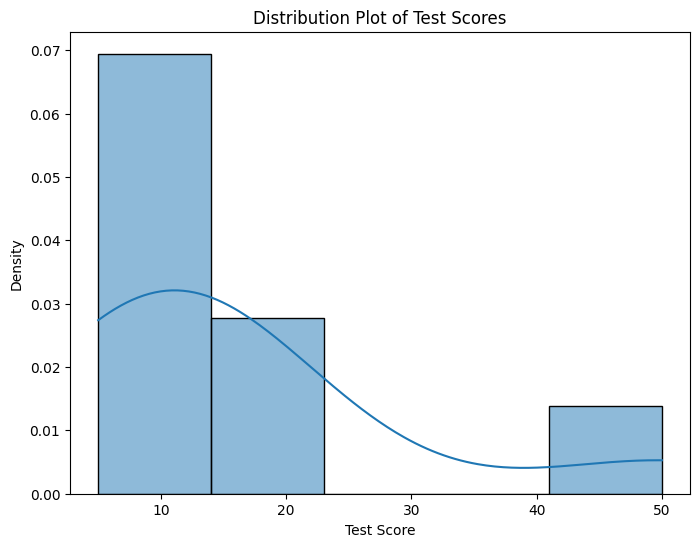

In [42]:
plt.figure(figsize=(8, 6))
sns.histplot(df['Test Score'], kde=True, stat="density", label='Density')
plt.title('Distribution Plot of Test Scores')
plt.show()

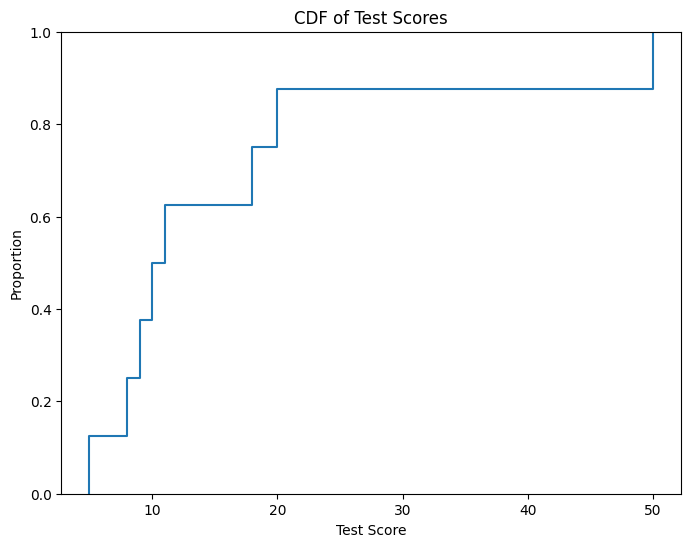

In [43]:
plt.figure(figsize=(8, 6))
sns.ecdfplot(df['Test Score'])
plt.title('CDF of Test Scores')
plt.show()

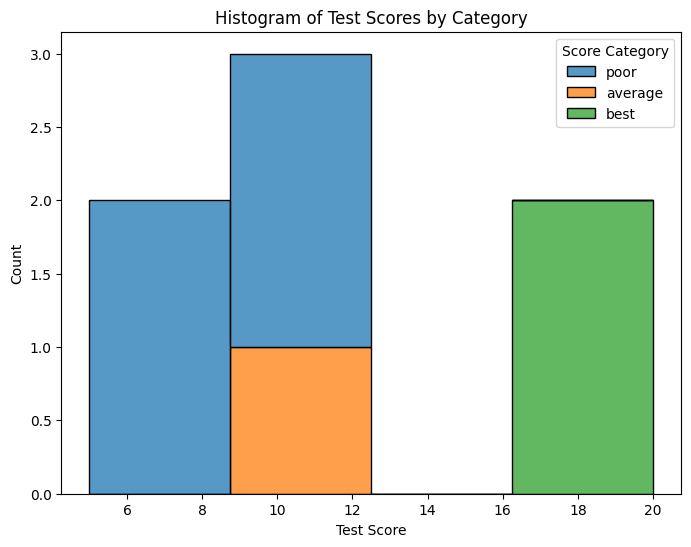

In [44]:
plt.figure(figsize=(8, 6))
sns.histplot(data=df, x='Test Score', hue='Score Category', multiple='stack')
plt.title('Histogram of Test Scores by Category')
plt.show()

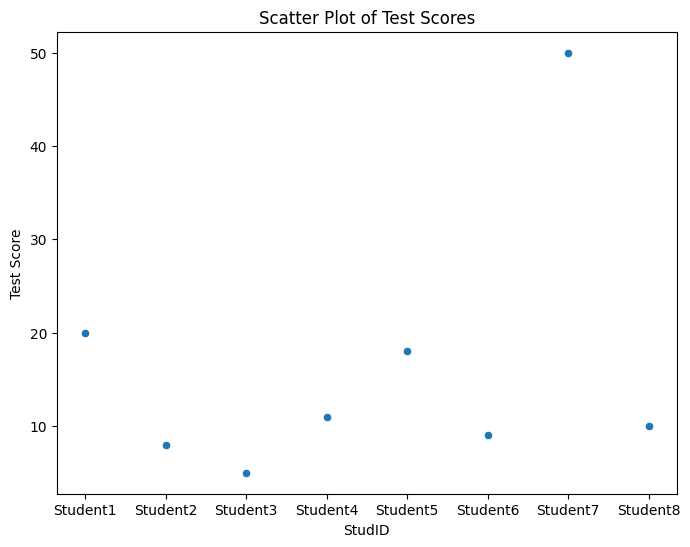

In [45]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='StudID', y='Test Score', data=df)
plt.title('Scatter Plot of Test Scores')
plt.show()